In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use("fivethirtyeight")

In [2]:
## Data reading
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic[titanic['sex'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Dropping rows with all NaN values
titanic.dropna(how = 'all', inplace = True)
titanic[titanic['sex'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


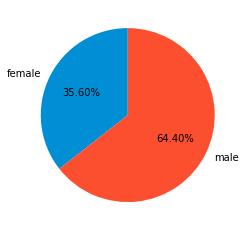

In [4]:
plt.pie(titanic.groupby('sex').count()['name'],
        labels = titanic.groupby('sex').count().index,
        autopct='%1.2f%%',
        startangle=90)
plt.show()

In [5]:
## Fare column NaN check

titanic[titanic['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN


In [6]:
## fare column has one NaN, this can be calculated by averaging of fare with below condition
## 1. Age greater then 60
## 2. Fare is not null
## 3. pclass is 3.0

fare_Nan = titanic[(titanic['age'] > 60) & 
                   (titanic['pclass'] == 3.0) & 
                   (titanic['fare'] > 0)]['fare'].mean()
titanic = titanic.fillna(value = {'fare':fare_Nan})
titanic.loc[1225]['fare']

7.82

In [7]:
## Age column, having NaN (Calculting the %age)
no_age = titanic[titanic['age'].isnull()].count()['pclass']
all_data = titanic.count()['pclass']
no_age/all_data * 100

20.091673032849503

In [8]:
## Age column has almost 20% data as Nan.
## So, we will be plotting this with three different approach
## 1. Dropping all NaN rows for "age" column.
## 2. Filling all these NaN with previous "age" value (if available)(forward fill)
## 3. Filling all these NaN with next "age" value (if available) (backword fill)
## We could do this with average(mean) age as well, but NaN volume is 20% of actual data. In this case, average won't be a good approach.

## Data Set creation

sub_titanic_dropNaN = titanic[['age','fare','sex']].dropna() ## count: 1046
sub_titanic_ffill = titanic[['age','fare','sex']].fillna(method = 'ffill') ## count: 1309
sub_titanic_bfill = titanic[['age','fare','sex']].fillna(method = 'bfill') ## count: 1309
color = {'female':'red','male':'blue'}

In [9]:
## function defination for plotting the three different dataset for same set of columns
def plot_scatter(data_frame,color,action = None, title = None):
  for gender in data_frame['sex'].unique():
    if action == "log":
      data_frame['log_fare'] = data_frame['fare'].apply(lambda x:np.log(x))
  #   plt.scatter(data_frame[data_frame['sex'] == gender]['age'],data_frame[data_frame['sex'] == gender]['fare'].apply(lambda x:np.log(x)) ,color = color[gender], label = gender)
      plt.scatter(data_frame[data_frame['sex'] == gender]['age'],
                  data_frame[data_frame['sex'] == gender]['log_fare'],
                  color = color[gender],
                  label = gender)
    else:
      plt.scatter(data_frame[data_frame['sex'] == gender]['age'],
                  data_frame[data_frame['sex'] == gender]['fare'],
                  color = color[gender],
                  label = gender)
  plt.legend(loc = (1,0))
  plt.xlabel('Age')
  plt.ylabel('Fare')
  if title != None:
    plt.title(title)
  plt.show()

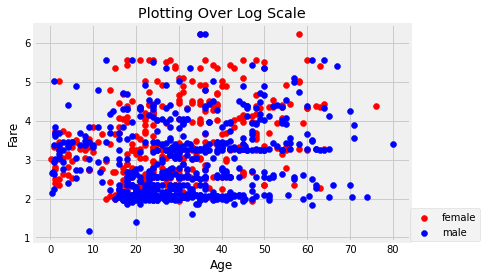

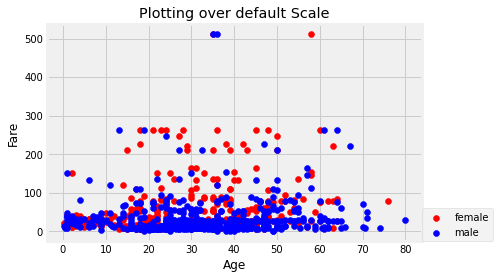

In [10]:
## 1. Dropping all NaN rows for "age" column.
plot_scatter(sub_titanic_dropNaN,color,'log',"Plotting Over Log Scale")
plot_scatter(sub_titanic_dropNaN,color,None,"Plotting over default Scale")

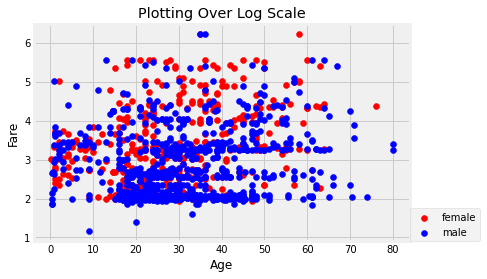

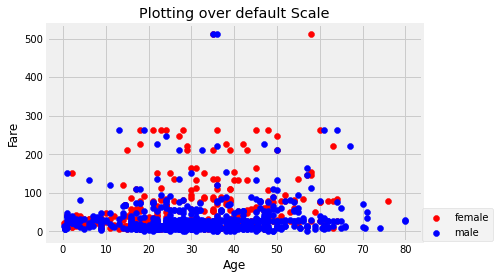

In [11]:
## 2. Filling all these NaN with previous "age" value (if available)(forward fill)
plot_scatter(sub_titanic_ffill,color,'log',"Plotting Over Log Scale")
plot_scatter(sub_titanic_ffill,color,None,"Plotting over default Scale")

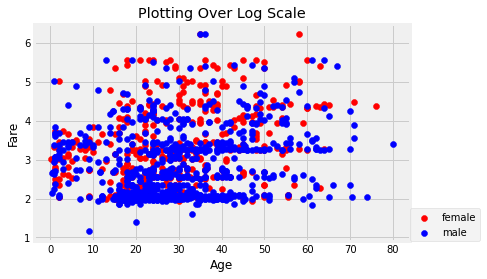

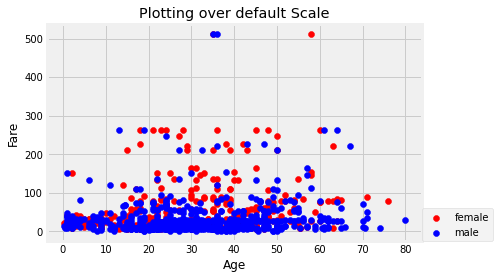

In [12]:
##3. Filling all these NaN with next "age" value (if available) (backword fill)
plot_scatter(sub_titanic_bfill,color,'log',"Plotting Over Log Scale")
plot_scatter(sub_titanic_bfill,color,None,"Plotting over default Scale")

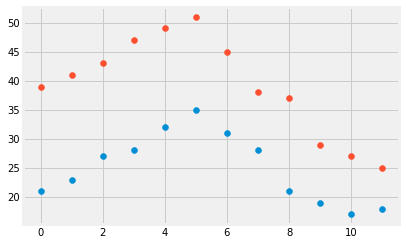

In [31]:
min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
mnth = np.arange(12)

plt.scatter(mnth,min)
plt.scatter(mnth,max)
plt.xticks(np.arange(0,12,2))
plt.show()

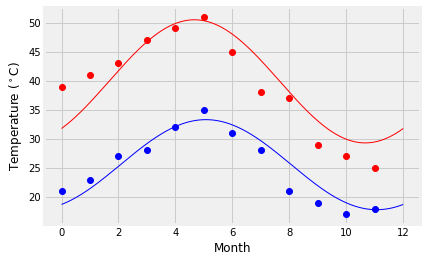

In [44]:
from scipy import optimize
def yearly_temps(times, avg, ampl,time_offset):
    return (avg
            + ampl * np.cos((times+time_offset) * 2.0 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, mnth,
                                      max,[20,10,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, mnth,
                                      min,[20,10,0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(mnth, max, 'ro',lw=0.5)
plt.plot(days, yearly_temps(days, *res_max), 'r-',lw = 1.0)
plt.plot(mnth, min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-', lw = 1.0)
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
